<a href="https://colab.research.google.com/github/arina080803/itmo_ML_course_2024/blob/hw_1/itmo_course_ML_hw1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задание 1

1. Выбрать и обосновать метрику для измерения качества.

В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения).

Критерии оценки:

Предложена метрика - 5 баллов.
Присутствует корректное обоснование - 5 баллов.

Дополнительный материал о метриках

2. Провести EDA на своих данных

В рамках данного пункта необходимо провести предварительный разведочный анализ своего набора данных.

Критерии оценки:

Рассмотрены базовые характеристики/статистики для набора данных - 2 балла.

Реализованы наиболее релевантные визуализации - 4 балла.

По ходу работы присутствуют комментарии (вы, как эксперт в предметной области, можете проинтерпретировать полученные результаты анализа, сделав выводы о том, каким образом лучше работать с набором данных в будущем, какие могут возникнуть проблемы, какую предобработку целесообразно сделать и тп) - 4 балла.

3. Построить и оценить качество бейзлайна

В рамках данного пункта необходимо выбрать и обучить бейзлайн-модель, а также измерить ее качество.

Критерии оценки:

Произведено измерение качества константного предсказания (например, наиболее частотный класс для классификации, среднее/медиана для регрессии) - 3 балла.
Бейзлайновая модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 5 балла.
Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 2 балла.

4. Использование библиотеки plotly для визуализации.

## **Импорт данных о результатах анализов пациентов, у которых есть подозрение на развитие язенного колита**

Этот набор данных содержит информацию об анализах и показателях здоровья пациентов, у которых возможно развитие зболевания язвенный колит.

Данные были предоставлены лабораторией Университета ИТМО.

**Целевой показатель - Индекс_UCEIS_0-**

In [71]:
from google.colab import drive
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, fbeta_score
from sklearn.metrics import precision_recall_curve

In [72]:
df = pd.read_csv('/content/sample_data/Data.csv - Minu.csv.csv')
df

,История Болезни,Вес,Рост,BMI,WAZ,HAZ,BAZ,HGB,RBC,PLT,...,Клостридии_(токсин_B),Клостридии_(токсин_А),Боль_в_животе,Примесь_крови_в_стуле,Консистенция_стула,Частота_стула,Ночные_дефекации,Толщина_сигмовидной_кишки_(УЗИ),Кровоток_сигмовидная_кишка_(УЗИ),Индекс_UCEIS_0-
0,14245/21,75.8,170.5,26.1,0.00,1.26,1.57,121.0,4.22,305.0,...,0.0,0.0,5,10,5,6,0,4.0,1.0,1
1,19129/22,97.0,171.0,33.2,0.00,1.23,2.63,124.0,4.51,361.0,...,0.0,0.0,5,30,10,10,10,5.3,2.0,1
2,2169/233,101.2,171.0,34.6,0.00,1.23,2.81,111.0,4.02,460.0,...,0.0,0.0,5,30,10,20,10,5.1,2.0,1
3,14050/21,57.0,176.0,18.4,0.00,0.35,-0.96,155.0,5.09,305.0,...,0.0,0.0,5,0,0,1,0,2.6,0.0,0
4,14146/21,51.0,170.0,17.6,0.00,1.13,-1.17,128.0,3.46,210.0,...,0.0,0.0,0,0,0,1,0,2.5,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,17189/22,27.8,140.0,14.2,-0.61,0.50,-1.36,79.0,2.96,309.0,...,0.0,0.0,10,30,10,3,0,7.0,2.0,1
93,19733/222,28.5,137.0,15.2,-0.53,-0.08,-0.73,87.0,3.51,511.0,...,NaN,NaN,10,30,10,5,0,4.0,0.0,1
94,17725/22,27.0,140.0,13.8,0.00,-0.47,-2.26,70.0,2.91,416.0,...,0.0,0.0,5,30,10,7,10,7.0,3.0,1
95,11396/22,23.5,140.0,12.0,-0.97,1.47,-3.05,113.0,4.63,249.0,...,0.0,0.0,5,0,0,1,0,2.5,0.0,1


Задача:

На основании признаков (анализов) пациентов нужно максимально точно предсказать, болеет ли человек язвенным колитом или нет. Для того, чтобы определить наличие болезни медицинским путем, требуется серьезное вмешательнство в организм человека, а именно биопсия и другие физические подходы изучения.
Модель машинного обучения не только обеспечит своевременное предупреждение пациентов, но и оптимизирует стратегии лечения для медицинского персонала. Это особенно актуально в контексте индивидуализации подхода к каждому пациенту. Результаты такого исследования будут полезны как пациентам, получая предупреждение об обострении, так и врачам, для более эффективного управления лечением и сокращения риска осложнений.


Метрики:

Для данной задачи нужно определить вероятноть принадлежности пациента к классам "больной" и "здоровый". Для этого будет использован алгоритм кластеризации.
На первый взгляд, для данного набота данных будет оптимально использовать такие метрики, как f1-score, recall и precision.

Recall  - для рассматриваемой задачи «цена» ложно положительного результата высока. Если, например, стоимость дальнейшей проверки наличия заболевания у пациента высока и мы просто не можем проверить все ложно положительные результаты, то стоит максимизировать данную метрику.

Precision - необходимо уделить особое внимание этой оценке, когда в поставленной задаче ошибка нераспознания положительного класса высока, например, при выставлении диагноза какой-либо серьезной болезни.

F1-score - в том случае, если Precision и Recall являются одинаково значимыми, можно использовать их среднее гармоническое для получения оценки результатов и выявление наиболее точного предсказания. Также можно использовать эту метрику как инструмент для поиска оптимальных под свою задачу параметров для Precision и Recall.

# EDA

In [ ]:
df.shape # информация о размерности датафрейма
df.info() # информация о размерности данных
          # описание индекса, количество not-a-number элементов
print("------------")
df.nunique() # количество уникальных значений для каждого столбца

Метод показывает количество строк в столбце - count, среднее значение столбца - mean, столбец стандартное отклонение - std, минимальные (min) и максимальные (max) значения, а также границу каждого квартиля - 25%, 50% и 75%.

In [74]:
df.describe()

,Вес,Рост,BMI,WAZ,HAZ,BAZ,HGB,RBC,PLT,WBC,...,Клостридии_(токсин_B),Клостридии_(токсин_А),Боль_в_животе,Примесь_крови_в_стуле,Консистенция_стула,Частота_стула,Ночные_дефекации,Толщина_сигмовидной_кишки_(УЗИ),Кровоток_сигмовидная_кишка_(УЗИ),Индекс_UCEIS_0-
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,...,94.0,92.0,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,48.653608,159.298969,18.618557,-0.125258,0.326701,-0.464845,121.061856,4.592268,367.432990,7.626082,...,0.0,0.0,4.536082,10.206186,3.659794,3.402062,1.855670,3.151546,0.226804,0.649485
std,16.382912,17.969688,3.856821,0.589332,1.025184,1.337745,19.609635,0.619913,111.925655,3.752069,...,0.0,0.0,2.708251,11.987787,4.178034,3.863989,3.907764,1.284614,0.586394,0.479610
min,17.000000,114.000000,11.900000,-2.820000,-2.900000,-3.260000,70.000000,2.910000,153.000000,2.990000,...,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.500000,0.000000,0.000000
25%,36.000000,146.000000,16.100000,0.000000,-0.120000,-1.200000,110.000000,4.200000,290.000000,5.560000,...,0.0,0.0,5.000000,0.000000,0.000000,1.000000,0.000000,2.100000,0.000000,0.000000
50%,50.500000,165.000000,18.200000,0.000000,0.310000,-0.480000,121.000000,4.540000,355.000000,6.810000,...,0.0,0.0,5.000000,0.000000,0.000000,2.000000,0.000000,2.900000,0.000000,1.000000
75%,57.000000,171.000000,20.400000,0.000000,1.060000,0.500000,134.000000,5.020000,431.000000,8.290000,...,0.0,0.0,5.000000,20.000000,5.000000,5.000000,0.000000,4.000000,0.000000,1.000000
max,101.200000,189.000000,34.600000,1.950000,3.160000,2.810000,167.000000,5.970000,657.000000,24.320000,...,0.0,0.0,10.000000,30.000000,10.000000,20.000000,10.000000,7.000000,3.000000,1.000000


Информация о количестве каждого уникального значения для каждого столбца в наборе данных:

In [ ]:
feature_names = df.columns.tolist()
for column in feature_names:
    # print(column)
    print(df[column].value_counts(dropna=False))
    print("------------")

Убираем столбцы, в которых содержание нулевых значений очень велико. Такие столбцы заведомо не могут имень высокую корелляцию на целевой показатель метрики:

In [ ]:
df.isnull().sum()

In [ ]:
# уберем столбцы с 0.00

df.drop(['WAZ', 'АТ_к_АГ_лямблий_сумм.', 'Клостридии_(токсин_B)', 'Клостридии_(токсин_А)', 'Кровоток_сигмовидная_кишка_(УЗИ)'], axis= 1 , inplace= True )
df

In [ ]:
corrs = df.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(np.bool))
upper_tri

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(upper_tri, cmap="YlGnBu", annot=True)

Столбцы, имеющие **маленькую корреляцию** с целевым показателем: "Рост", "HAZ", "RBC", "Лимфоциты", "Ig_G", "Ig_M", "АЛТ", "ГГТ", "Мочевина", "Yersinia_enter/pseudo_IgA", "Yersinia_enter/pseudo_IgG", "Yersinia_enter/pseudo_IgM".

**Самая сильная корреляция**: "Толщина_сигмовидной_кишки_(УЗИ)", "Консистенция_стула", "Примесь_крови_в_стуле", "Кальпротектин", "Мочевая_кислота", "COE", "WBC"

In [ ]:
fig = px.imshow(df, color_continuous_scale='RdYlBu')
fig.show()

Оставим только важные для исследования показатели и целевой показатель:

In [8]:
df_corr_aygmented = df[["Толщина_сигмовидной_кишки_(УЗИ)", "Консистенция_стула", "Примесь_крови_в_стуле", "Кальпротектин", "Мочевая_кислота", "СОЭ", "WBC", "Индекс_UCEIS_0-"]]
df_corr_aygmented

,Толщина_сигмовидной_кишки_(УЗИ),Консистенция_стула,Примесь_крови_в_стуле,Кальпротектин,Мочевая_кислота,СОЭ,WBC,Индекс_UCEIS_0-
0,4.0,5,10,710.00,239.13,6.0,7.69,1
1,5.3,10,30,307.00,291.98,7.0,8.15,1
2,5.1,10,30,400.00,304.46,20.0,8.26,1
3,2.6,0,0,52.52,361.57,3.0,8.95,0
4,2.5,0,0,101.77,255.40,9.0,2.99,0
...,...,...,...,...,...,...,...,...
92,7.0,10,30,800.00,282.12,14.0,9.44,1
93,4.0,10,30,1000.00,NaN,5.0,9.42,1
94,7.0,10,30,121.00,160.09,4.0,8.93,1
95,2.5,0,0,158.30,286.99,6.0,6.55,1


In [ ]:
fig = px.imshow(df_corr_aygmented, color_continuous_scale='RdYlBu')
fig.show()

По графику видно, что потребуется нормализация данных, чтобы каждый из параметров одинаково влиял на целевую переменную.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
for idx, feature in enumerate(df_corr_aygmented.columns):
    df_corr_aygmented.plot(feature, "Индекс_UCEIS_0-", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4], color='darkorange')

Посмотрим на распределение значений в признаках:

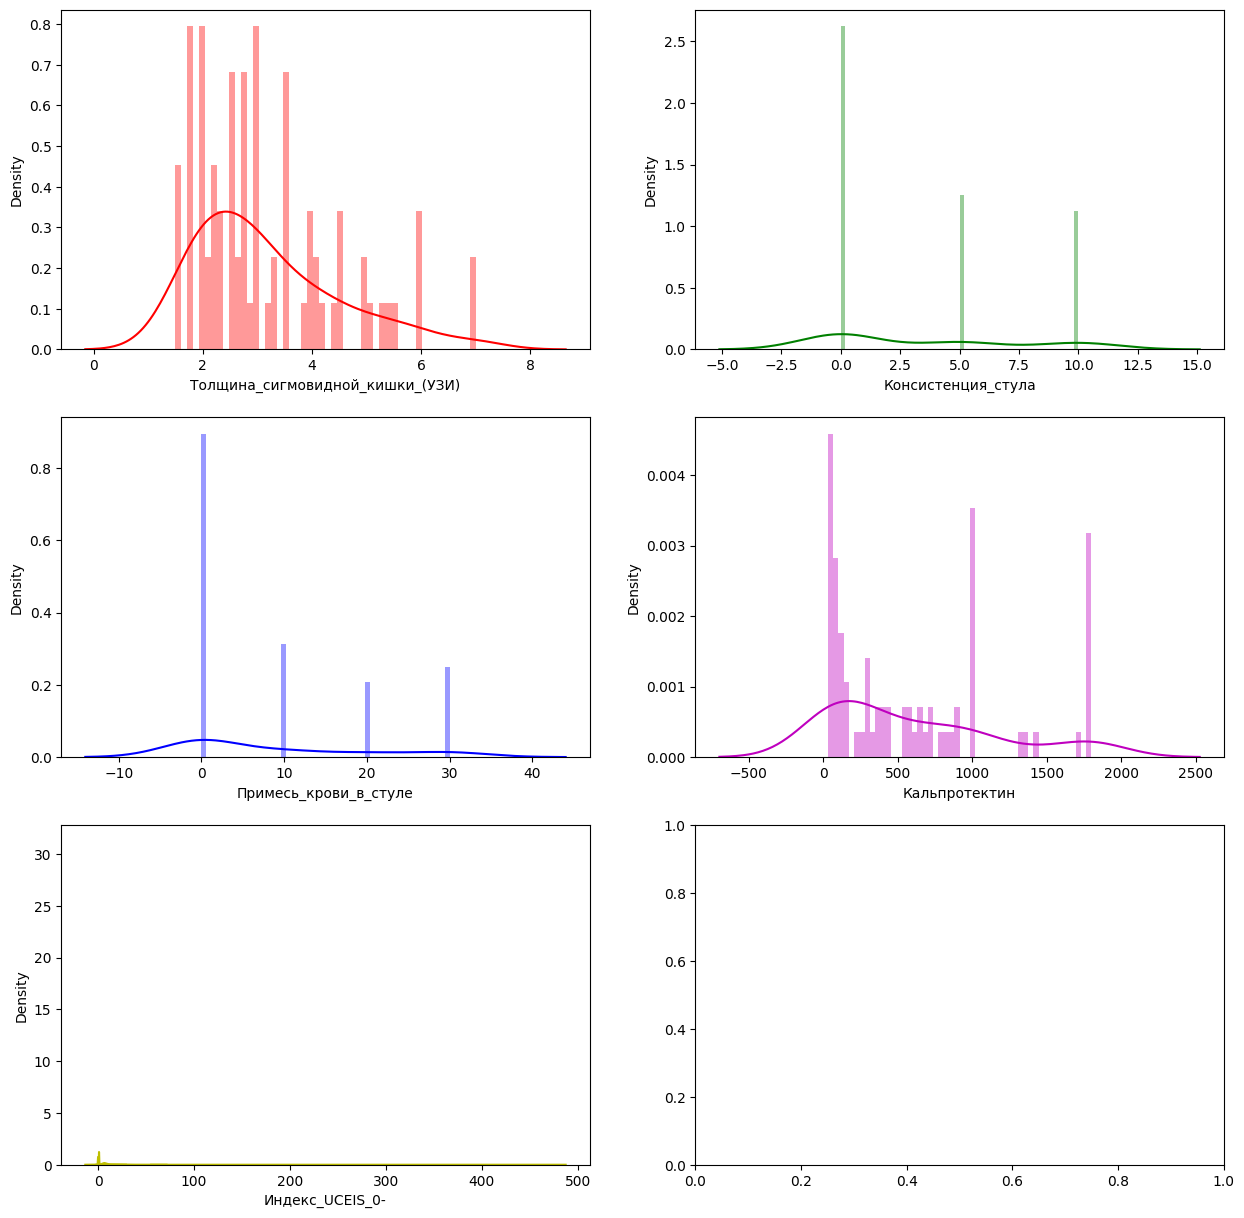

In [83]:
# "Толщина_сигмовидной_кишки_(УЗИ)", "Консистенция_стула", "Примесь_крови_в_стуле", "Кальпротектин", "Мочевая_кислота", "СОЭ", "WBC", "Индекс_UCEIS_0-"

fig, axes = plt.subplots(3, 2, figsize=(15, 15))
sns.distplot(df_corr_aygmented['Толщина_сигмовидной_кишки_(УЗИ)'], bins=50, color='r', ax=axes[0, 0])
sns.distplot(df_corr_aygmented['Консистенция_стула'], bins=50, color='g', ax=axes[0, 1])
sns.distplot(df_corr_aygmented['Примесь_крови_в_стуле'], bins=50, color='b', ax=axes[1, 0])
sns.distplot(df_corr_aygmented['Кальпротектин'].dropna(), bins=50, color='m', ax=axes[1, 1])
sns.distplot(df_corr_aygmented['Мочевая_кислота'], bins=50, color='y', ax=axes[2, 0])
sns.distplot(df_corr_aygmented['СОЭ'], bins=50, color='y', ax=axes[2, 0])
sns.distplot(df_corr_aygmented['WBC'], bins=50, color='y', ax=axes[2, 0])
sns.distplot(df_corr_aygmented['Индекс_UCEIS_0-'], bins=50, color='y', ax=axes[2, 0])

Исходный датасет содержит слишком маленький для обучения набор данных. Увеличим количество строк датасета до 30000 при помощи бутстрапа.

In [ ]:
# Количество новых образцов, которые вы хотите создать
num_bootstrap_samples = 300

# Создать новые образцы с использованием бутстрапа
bootstrap_samples = []

for _ in range(num_bootstrap_samples):
    # Случайный выбор строк с возвратом
    bootstrap_sample = df_corr_aygmented.sample(n=df_corr_aygmented.shape[0], replace=True)
    bootstrap_samples.append(bootstrap_sample)

# Объединить новые образцы с исходным DataFrame
df_augmented = pd.concat([df_corr_aygmented] + bootstrap_samples, ignore_index=True)

# Просмотреть аугментированный DataFrame
print(df_augmented)

In [85]:
df_augmented = df_augmented.dropna()

**PCA**

In [86]:
df_corr_aygmented.shape

(80, 8)

In [87]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_corr_aygmented)
df_scaled[:5]

array([[ 0.63039705,  0.36927447,  0.10062935,  0.163828  , -0.32821804,
        -0.59724641,  0.0156066 ,  0.77459667],
       [ 1.61925517,  1.60018938,  1.88959554, -0.53189552,  0.55683233,
        -0.51515068,  0.13885188,  0.77459667],
       [ 1.46712315,  1.60018938,  1.88959554, -0.37134394,  0.76582814,
         0.55209376,  0.16832357,  0.77459667],
       [-0.43452708, -0.86164044, -0.79385375, -0.97121989,  1.72221843,
        -0.84353359,  0.35319149, -1.29099445],
       [-0.51059309, -0.86164044, -0.79385375, -0.8861966 , -0.05575315,
        -0.35095923, -1.2436386 , -1.29099445]])

In [88]:
df_scaled.shape

(80, 8)

In [89]:
model = PCA(n_components=3)
model.fit(df_scaled)
df_pca_3 = model.transform(df_scaled)

In [90]:
def draw_3d(data):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    for f in data:
        ax.scatter(f[0], f[1], f[2], c='b')
    plt.show()

На 30000 строках- выполняется очень долго, 3d визуализацию лучше делать на исходной выборке из датасета


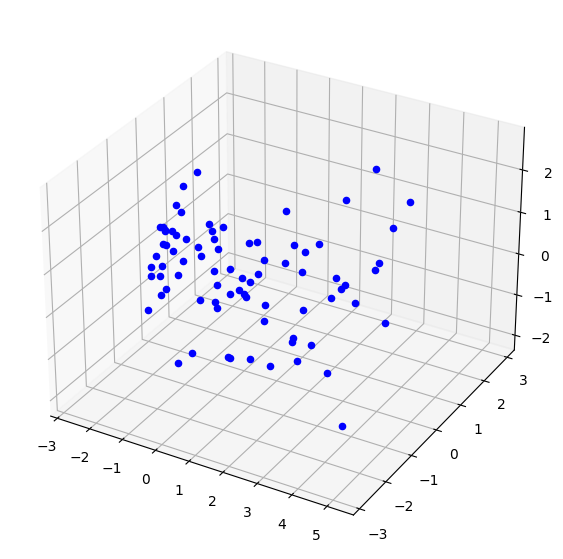

In [91]:
draw_3d(df_pca_3)

In [92]:
model = PCA(n_components=2)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.55185995,  0.87089682],
       [ 2.26966454,  0.64414821],
       [ 2.62632767, -0.00295122],
       [-1.44307818, -1.72961521],
       [-2.183588  , -0.38804545]])

In [93]:
df_class = df_corr_aygmented['Индекс_UCEIS_0-'].dropna()

df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

Следующий код для визуализации также следует выполнять на исходном количестве данных!

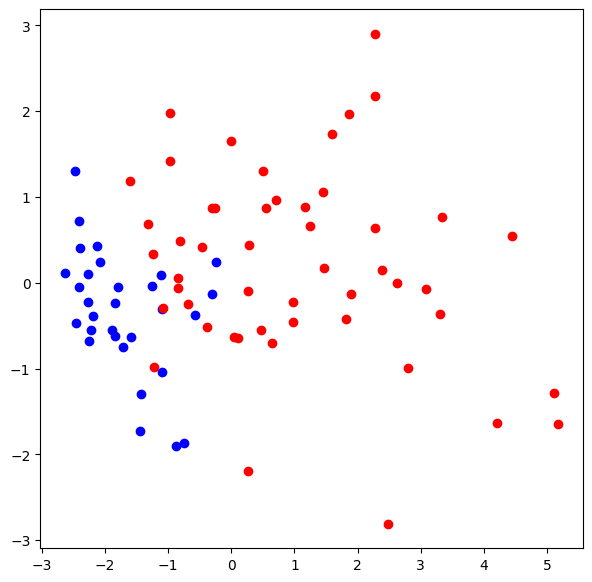

In [94]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], c=colors[int(f[1]['class'])])

plt.show()

In [95]:
model = PCA(n_components=3)
model.fit(df_scaled)
pca_coords = model.transform(df_scaled)
pca_coords[:5]

array([[ 0.55185995,  0.87089682, -0.08485773],
       [ 2.26966454,  0.64414821,  0.08629792],
       [ 2.62632767, -0.00295122,  0.0300131 ],
       [-1.44307818, -1.72961521, -0.23174089],
       [-2.183588  , -0.38804545, -0.08924116]])

In [96]:
df_to_draw = pd.DataFrame({
    'class': df_class,
    'pca1': pca_coords[:, 0],
    'pca2': pca_coords[:, 1],
    'pca3': pca_coords[:, 2],
})
colors = ['b', 'r', 'k', 'g', 'c', 'm', 'y', 'gold', 'darkorange', 'lime']

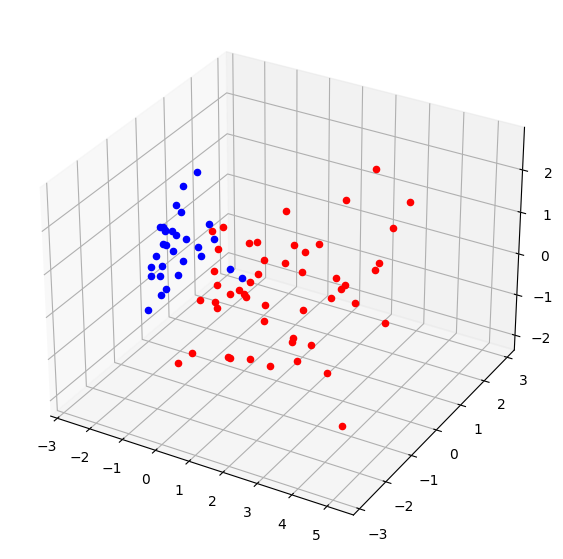

In [97]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

for f in df_to_draw.iterrows():
    ax.scatter(f[1]['pca1'], f[1]['pca2'], f[1]['pca3'], c=colors[int(f[1]['class'])])
plt.show()

Разделим данные на train и test выборки:

In [98]:
df_augmented = df_augmented.dropna()

In [99]:
y = 1 - df_augmented["Индекс_UCEIS_0-"]
X = df_augmented.loc[:, df_augmented.columns != 'Индекс_UCEIS_0-']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

In [100]:
X_train.shape

(18060, 7)

In [101]:
a = X_train.dropna()
a.shape

(18060, 7)

# DummyClassifier - baseline

In [102]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train);

In [103]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC())])

pipe.fit(X_train, y_train).score(X_test, y_test)

0.9906976744186047

In [104]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



# Accuracy, Precision & Recall

In [105]:
y_pred_dummy = dummy_clf.predict(X_test)
accuracy_score(y_test, y_pred_dummy)

0.627906976744186

In [106]:
y_pred_log_reg = log_reg.predict(X_test)
accuracy_score(y_test, y_pred_log_reg)

0.7857142857142857

Результаты работы моделей имеют достаточно низкое качество предсказаний. Однако, можно сделать вывод, что модель логистической регрессии работает чуть лучше.

Посмотрим, сможет ли другая метрика выдать лучший результат.

In [107]:
confusion_matrix(y_test, y_pred_dummy)

array([[3780,    0],
       [2240,    0]])

In [108]:
confusion_matrix(y_test, y_pred_log_reg)

array([[3111,  669],
       [ 621, 1619]])

Аналагичная ситуация: во втором случае доля истино-положительного решения одновременно с долей истино-отрицательного решения значительно больше, чем доли ложно-положительного решения и ложно-отрицательного решения.

In [109]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

Precision for Dummy Classificator: 0.0
Precision for Logistic regression: 0.7076048951048951


In [110]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Recall for Dummy Classificator: 0.0
Recall for Logistic regression: 0.7227678571428572


И вновь модель логистической регрессии справляется лучше. Но результат по-прежнему неудовлетворительный.

Как можно объяснить столь неудовлетворительные результаты для метрик Accuracy, Precision & Recall?

Возможно, при увеличении количества данных методом бутстрапа произошел слишком сильный пересчет значений, они потеряли первоначальную структуру и больше не могут отражать реалную картину собранных у пациентов анализов.

# F-мера

In [111]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Dummy Classificator: 0.0
F1-score for Logistic regression: 0.7151060070671378


In [112]:
print(f'F1-score for Dummy Classificator (recall bias): {fbeta_score(y_test, y_pred_dummy, beta=2)}')
print(f'F1-score for Logistic regression (recall bias): {fbeta_score(y_test, y_pred_log_reg, beta=2)}')

F1-score for Dummy Classificator (recall bias): 0.0
F1-score for Logistic regression (recall bias): 0.7196834992887624


In [113]:
print(f'Fbeta-score for Dummy Classificator (precision bias): {fbeta_score(y_test, y_pred_dummy, beta=0.5)}')
print(f'Fbeta-score for Logistic regression (precision bias): {fbeta_score(y_test, y_pred_log_reg, beta=0.5)}')

Fbeta-score for Dummy Classificator (precision bias): 0.0
Fbeta-score for Logistic regression (precision bias): 0.7105863764044944


Чтобы улучшить показание метрик попровуем и перебрать пороги бинаризации при классификации:

In [114]:
y_pred = log_reg.predict_proba(X_test)[:, 1]

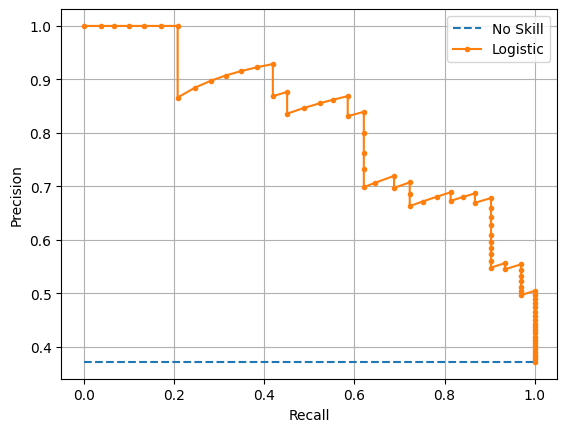

In [115]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)

no_skill = len(y_test[y_test == 1]) / len(y_test)

plt.plot([0,1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.grid()
plt.show()

Согласно поставленной задаче очень важно максимизировать метрику Recall стоимость дальнейшей проверки наличия заболевания у пациента высока. Precision так жне важна, тк ошибка нераспознания положительного класса высока, что может привести к фальсификации результата обследования.

Так как обе эти метрики очень важны, в дальнейшем нужно будет найти общий знаменатель между этими показателями. На данный момент этим знаменателем, судя по графику, будет отметка 0.7 каждого из показателей.

**Выводы**

Возможно, исходный датасет нужно увеличить другим способом и хотя бы до 20000 строк, а не 30000. Тогда новые значения пересчитаются более корректным способом и метрики будут выдавать более высокий результат обучения.